In [1]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [2]:
root_path = "crusher"

In [3]:
name_re = re.compile("(weak|strong)_scaling-(\d+pt)-n_(\d+)-([\w_]+)_comm-(gpu|cpu)-nodes_(\d+)")

In [4]:
time_re = re.compile("DURATION:\s*(\d+(\.\d+)?(e[+-]\d+)?)")

In [5]:
size_re = re.compile("SIZE:\s*(\d+)")

In [6]:
stencil_type = dict([((True, 2), "5pt"), ((True, 3), "7pt"), ((False, 2), "9pt"), ((False, 3), "27pt")])

In [7]:
num_gpus = 8

In [8]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    if m := name_re.search(file.name):
        with open(file, "r") as input:
            input_str = input.read()
            duration = 0
            size = 0
            if t_m := time_re.search(input_str):
                duration = t_m.group(1)
            if s_m := size_re.search(input_str):
                size = s_m.group(1)
            data.append({"scaling": m.group(1), "stencil": m.group(2), "n": m.group(3),
                         "comm_pattern": m.group(4),
                         "type": m.group(5), "nodes": m.group(6), "time": duration, "size": size})
df = pd.DataFrame(data).drop(columns=["scaling", "type"]).astype({"n": int, "nodes": int, "time": float, "size": int})
df

,stencil,n,comm_pattern,nodes,time,size
0,9pt,1000000,optimal,1,0.000462,8000000
1,27pt,1000000,optimal,1,0.000749,8000000
2,9pt,1000000,optimal,128,0.000567,1024000000
3,27pt,1000000,optimal,128,0.000864,1024000000
4,9pt,1000000,optimal,16,0.000509,128000000
5,27pt,1000000,optimal,16,0.000799,128000000
6,9pt,1000000,optimal,2,0.000478,16000000
7,27pt,1000000,optimal,2,0.000766,16000000
8,9pt,1000000,optimal,32,0.000527,256000000
9,27pt,1000000,optimal,32,0.000815,256000000


In [9]:
df["gpus"] = df["nodes"] * num_gpus

In [10]:
piv = df.drop(columns=["size", "nodes"]).pivot(index="gpus", columns=["stencil", "comm_pattern", "n"], values="time")
piv = piv[piv.columns.sort_values()]
piv

stencil,27pt,5pt,7pt,9pt
comm_pattern,optimal,optimal,optimal,optimal
n,1000000,1000000,1000000,1000000
gpus,,,,
8,0.000749,0.000347,0.000387,0.000462
16,0.000766,0.000362,0.000402,0.000478
32,0.000777,0.000374,0.000414,0.000490
64,0.000787,0.000384,0.000423,0.000499
128,0.000799,0.000397,0.000435,0.000509
256,0.000815,0.000411,0.000452,0.000527
512,0.000830,0.000431,0.000468,0.000543


In [11]:
piv["5pt"]

comm_pattern,optimal
n,1000000
gpus,
8,0.000347
16,0.000362
32,0.000374
64,0.000384
128,0.000397
256,0.000411
512,0.000431
1024,0.000448


In [54]:
df["flop"] = df["size"] * (df.stencil.apply(lambda s: int(s[:-2])) *2 + 12)
df["flop/s"] = df.flop / df.time
df

,stencil,n,comm_pattern,nodes,time,size,gpus,flop,flop/s
0,9pt,1000000,optimal,1,0.000462,8000000,8,240000000,5.195592e+11
1,27pt,1000000,optimal,1,0.000749,8000000,8,528000000,7.048101e+11
2,9pt,1000000,optimal,128,0.000567,1024000000,1024,30720000000,5.415688e+13
3,27pt,1000000,optimal,128,0.000864,1024000000,1024,67584000000,7.826117e+13
4,9pt,1000000,optimal,16,0.000509,128000000,128,3840000000,7.539139e+12
5,27pt,1000000,optimal,16,0.000799,128000000,128,8448000000,1.056946e+13
6,9pt,1000000,optimal,2,0.000478,16000000,16,480000000,1.003502e+12
7,27pt,1000000,optimal,2,0.000766,16000000,16,1056000000,1.378081e+12
8,9pt,1000000,optimal,32,0.000527,256000000,256,7680000000,1.458551e+13
9,27pt,1000000,optimal,32,0.000815,256000000,256,16896000000,2.074315e+13


In [55]:
piv_flops = df[df.n >= 100000].drop(columns=["size", "nodes", "flop", "time"]).pivot(index="gpus", columns=["comm_pattern", "n", "stencil"], values="flop/s")
piv_flops = piv_flops[piv_flops.columns.sort_values()]
piv_flops["optimal"][1000000]

stencil,27pt,5pt,7pt,9pt
gpus,,,,
8,7.048101e+11,5.069402e+11,5.375802e+11,5.195592e+11
16,1.378081e+12,9.721474e+11,1.034334e+12,1.003502e+12
32,2.717063e+12,1.883446e+12,2.007858e+12,1.960380e+12
64,5.366188e+12,3.670012e+12,3.931464e+12,3.847803e+12
128,1.056946e+13,7.084330e+12,7.649854e+12,7.539139e+12
256,2.074315e+13,1.369820e+13,1.472912e+13,1.458551e+13
512,4.072488e+13,2.611367e+13,2.844748e+13,2.826824e+13
1024,7.826117e+13,5.026776e+13,5.446352e+13,5.415688e+13


In [56]:
_df = piv_flops["optimal"][1000000]
linear_scaling_x = [1] + list(_df.index) + [2000]
linear_scaling = [_df["27pt"][8] * 1.2 / 1e12 * i / _df.index[0] for i in linear_scaling_x]
linear_scaling

[0.10572150925463666,
 0.8457720740370933,
 1.6915441480741866,
 3.3830882961483733,
 6.7661765922967465,
 13.532353184593493,
 27.064706369186986,
 54.12941273837397,
 108.25882547674794,
 211.44301850927332]

In [57]:
4.624524e+13 * 3

138735720000000.0

In [58]:
linear_scaling_x

[1, 8, 16, 32, 64, 128, 256, 512, 1024, 2000]

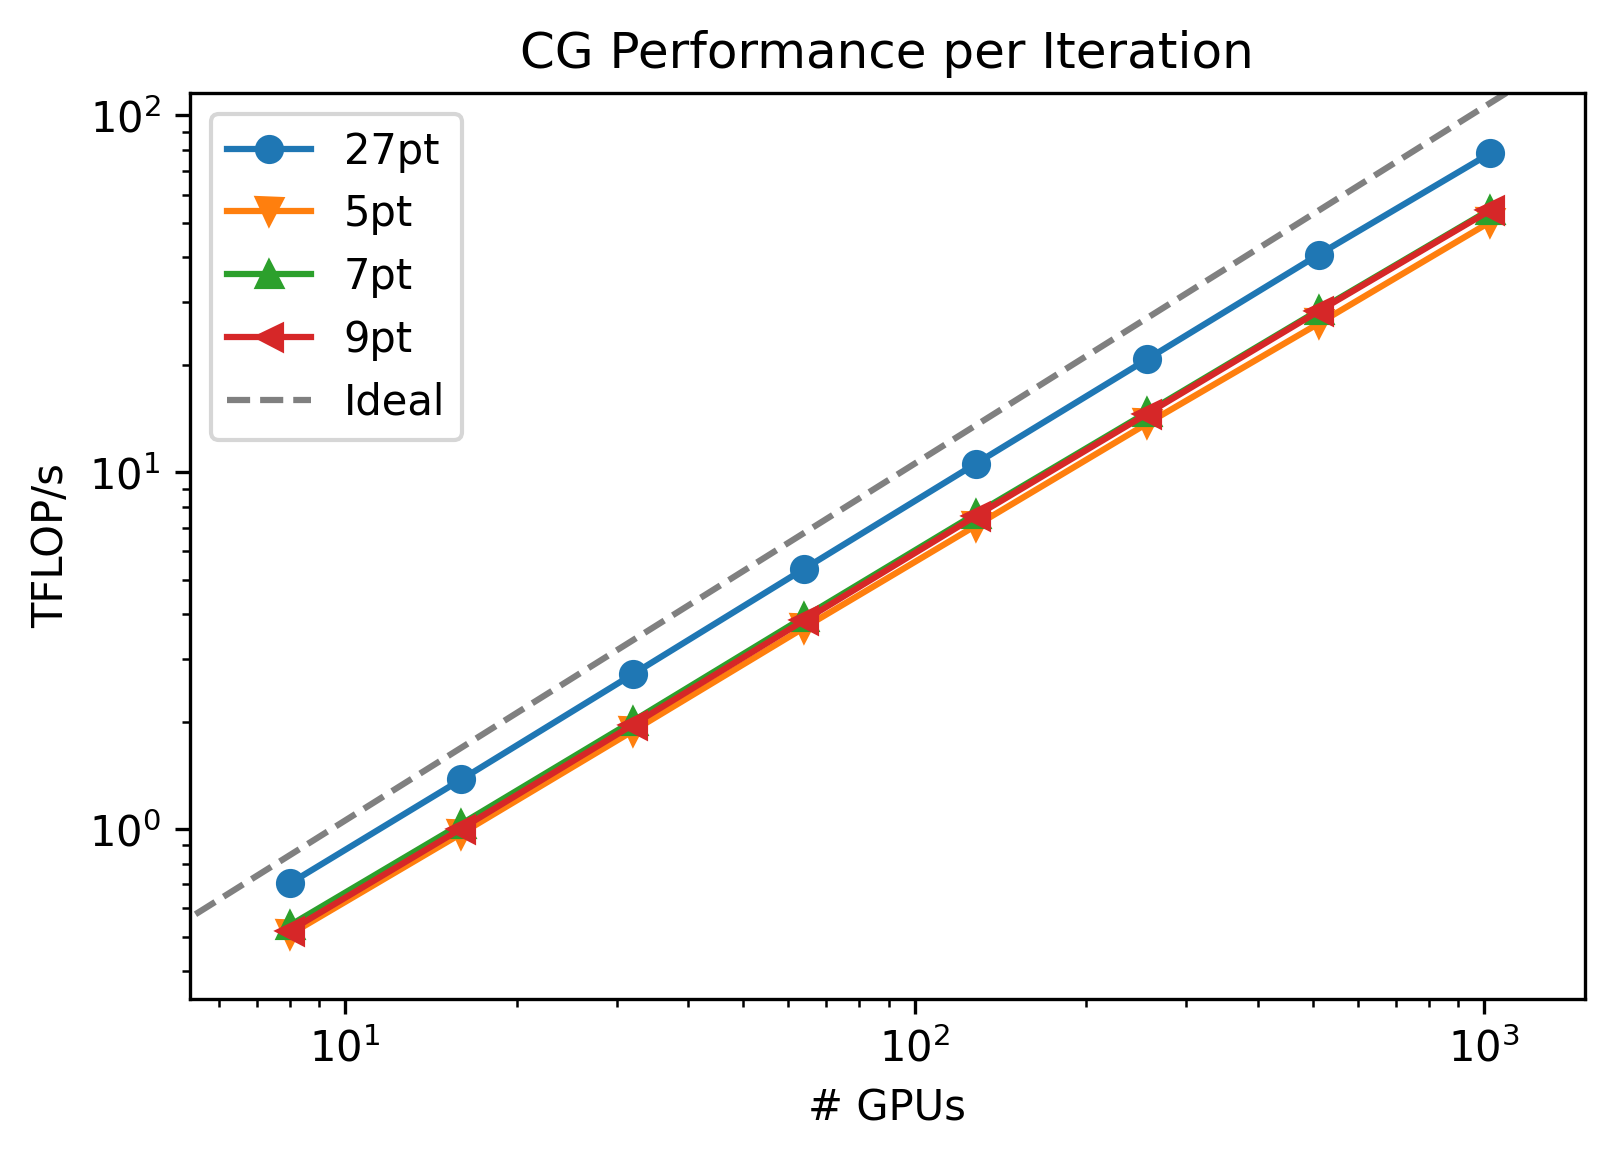

In [59]:
_df = piv_flops["optimal"][1000000]
fig, ax = plt.subplots(dpi=300)
ax.set_prop_cycle(default_cycler)
ax.set_title(f"CG Performance per Iteration")
(_df / 1e12).plot(ax=ax, legend=True, logx=True, logy=True)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(linear_scaling_x, linear_scaling, '--', color="grey", )
ax.legend([n for n in piv_flops.columns.levels[2]] + ["Ideal"])
ax.set_xlim([xlim[0] * 0.85, xlim[1] * 1.15])
ax.set_ylim([ylim[0] * 0.85, ylim[1] * 1.15])
ax.set_xlabel("# GPUs")
ax.set_ylabel("TFLOP/s")
fig.savefig(f"{root_path}/img/optimal-flops.png")

In [27]:
"3pt"[:-2]

'3'